In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
from collections import defaultdict
random.seed(22)
import pickle
import time

In [2]:
fh = open('../gene_filter_set', 'rb')
gene_filter = pickle.load(fh)
fh.close()

In [3]:
fh = open('A549_read_to_gene_dict', 'rb')
A549_read_dict = pickle.load(fh)
fh.close()

In [4]:
fh = open('HEPG2_read_to_gene_dict', 'rb')
HepG2_read_dict = pickle.load(fh)
fh.close()

In [5]:
fh = open('NTERA_read_to_gene_dict', 'rb')
NTERA_read_dict = pickle.load(fh)
fh.close()

In [6]:
fh = open('SHSY5Y_read_to_gene_dict', 'rb')
SHSY5Y_read_dict = pickle.load(fh)
fh.close()

In [7]:
fh = open('HeLa_read_to_gene_dict', 'rb')
HeLa_read_dict = pickle.load(fh)
fh.close()

In [8]:
gm12878_read_dict = {}
for line in open('gm12878.filtered.sam', 'r'):
    if line [:3] == '@SQ':
        continue
    else:
        split_line = line.split('\t')
        read_id = split_line[0]
        gene_info = split_line[2][:-1].split('|')
        if gene_info[-1] not in gene_filter:
            continue
        gene = gene_info[5]
        gm12878_read_dict[read_id] = gene

In [9]:
print(len(gm12878_read_dict))

206063


In [10]:
gene_coverage_dict = {'HepG2_NTERA':{}, 'All_cell_lines':{}, 'HeLa_A549':{}}

In [11]:
gm12878_genes = set([gm12878_read_dict[x] for x in random.sample(list(gm12878_read_dict.keys()),150000)])

In [12]:
print(len(gm12878_genes))

10133


In [13]:
def genes(gm12878_genes, read_dicts, n):
    tmp_gene_set = set()
    for read_dict in read_dicts:
        sample_genes = [read_dict[x] for x in random.sample(list(read_dict.keys()), n)]
        for gene in sample_genes:
            if gene in gm12878_genes:
                tmp_gene_set.add(gene)
    return len(tmp_gene_set)/len(gm12878_genes)

In [14]:
for i in range(100):
    if i % 5 == 0:
        print(f"{i=}")
    for j in range(0,1000001,100000):
        if j % 500000 == 0:
            print(f"{j=}")
        for key in gene_coverage_dict:
            if j not in gene_coverage_dict[key]:
                gene_coverage_dict[key][j] = {}
        gene_coverage_dict['HepG2_NTERA'][j][i] = genes(gm12878_genes, [HepG2_read_dict, NTERA_read_dict], int(j/2))

i=0
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=5
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=10
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=15
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=20
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=25
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=30
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=35
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=40
j=0
j=500000
j=1000000
j=0
j=500000
j

In [15]:
print(gene_coverage_dict)

{'HepG2_NTERA': {0: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0, 48: 0.0, 49: 0.0, 50: 0.0, 51: 0.0, 52: 0.0, 53: 0.0, 54: 0.0, 55: 0.0, 56: 0.0, 57: 0.0, 58: 0.0, 59: 0.0, 60: 0.0, 61: 0.0, 62: 0.0, 63: 0.0, 64: 0.0, 65: 0.0, 66: 0.0, 67: 0.0, 68: 0.0, 69: 0.0, 70: 0.0, 71: 0.0, 72: 0.0, 73: 0.0, 74: 0.0, 75: 0.0, 76: 0.0, 77: 0.0, 78: 0.0, 79: 0.0, 80: 0.0, 81: 0.0, 82: 0.0, 83: 0.0, 84: 0.0, 85: 0.0, 86: 0.0, 87: 0.0, 88: 0.0, 89: 0.0, 90: 0.0, 91: 0.0, 92: 0.0, 93: 0.0, 94: 0.0, 95: 0.0, 96: 0.0, 97: 0.0, 98: 0.0, 99: 0.0}, 100000: {0: 0.6898253232014211, 1: 0.6859765123852758, 2: 0.6917003848810817, 3: 0.68893

In [16]:
for i in range(100):
    if i % 5 == 0:
        print(f"{i=}")
    for j in range(0,1000001,100000):
        if j % 500000 == 0:
            print(f"{j=}")
        for key in gene_coverage_dict:
            if j not in gene_coverage_dict[key]:
                gene_coverage_dict[key][j] = {}
        gene_coverage_dict['All_cell_lines'][j][i] = genes(gm12878_genes, [HepG2_read_dict, NTERA_read_dict, HeLa_read_dict, SHSY5Y_read_dict, A549_read_dict], int(j/5))

i=0
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=5
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=10
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=15
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=20
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=25
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=30
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=35
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=40
j=0
j=500000
j=1000000
j=0
j=500000
j

In [17]:
for i in range(100):
    if i % 5 == 0:
        print(f"{i=}")
    for j in range(0,1000001,100000):
        if j % 500000 == 0:
            print(f"{j=}")
        for key in gene_coverage_dict:
            if j not in gene_coverage_dict[key]:
                gene_coverage_dict[key][j] = {}
        gene_coverage_dict['HeLa_A549'][j][i] = genes(gm12878_genes, [HeLa_read_dict, A549_read_dict], int(j/2))

i=0
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=5
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=10
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=15
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=20
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=25
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=30
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=35
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
j=0
j=500000
j=1000000
i=40
j=0
j=500000
j=1000000
j=0
j=500000
j

In [18]:
df_not_similar =pd.DataFrame.from_dict(gene_coverage_dict['HepG2_NTERA'], orient = 'index')
df_not_similar.reset_index(inplace=True)
df_not_similar.rename(columns={'index':'Samples'}, inplace=True)
df_not_similar = df_not_similar.melt(id_vars=['Samples'],var_name='Rep', value_name='Saturation')
cell_line_not_similar = ['HepG2_NTERA']*df_not_similar.shape[0]
df_not_similar['Cell_Line'] = cell_line_not_similar

In [19]:
df_all =pd.DataFrame.from_dict(gene_coverage_dict['All_cell_lines'], orient = 'index')
df_all.reset_index(inplace=True)
df_all.rename(columns={'index':'Samples'}, inplace=True)
df_all = df_all.melt(id_vars=['Samples'],var_name='Rep', value_name='Saturation')
cell_line_all = ['All_cell_lines']*df_all.shape[0]
df_all['Cell_Line'] = cell_line_all

In [20]:
df_similar =pd.DataFrame.from_dict(gene_coverage_dict['HeLa_A549'], orient = 'index')
df_similar.reset_index(inplace=True)
df_similar.rename(columns={'index':'Samples'}, inplace=True)
df_similar = df_similar.melt(id_vars=['Samples'],var_name='Rep', value_name='Saturation')
cell_line_similar = ['HeLa_A549']*df_similar.shape[0]
df_similar['Cell_Line'] = cell_line_similar

In [21]:
df = pd.concat([df_similar, df_all, df_not_similar], axis = 0, ignore_index=True)
df.head()
df.to_csv('gm12878_gene_representation_df', sep='\t')

In [22]:
df = pd.read_csv('gm12878_gene_representation_df', sep='\t')

In [23]:
sns.set(rc={"figure.figsize":(11.2, 8)}) #(width, height)

[Text(0.5, 1.0, 'Average Representation of all genes in gm12878 subsample'),
 Text(0.5, 0, 'Reads Sampled From Cell Lines'),
 Text(0, 0.5, 'Average Representation')]

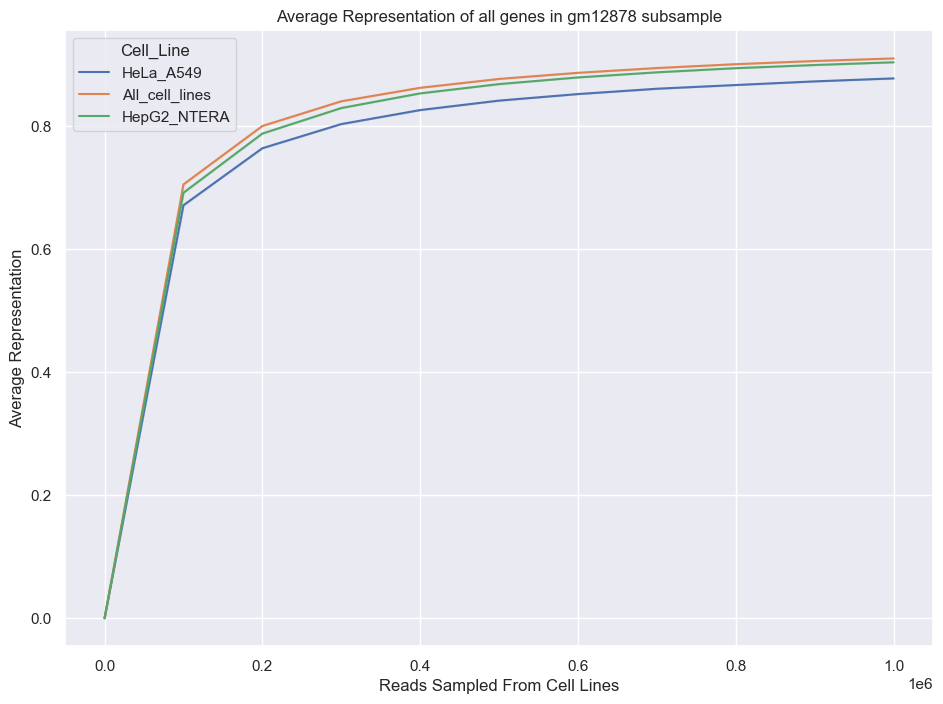

In [24]:
fig = sns.lineplot(data=df, x = 'Samples', y = 'Saturation', hue = 'Cell_Line')
fig.set(title = 'Average Representation of all genes in gm12878 subsample', xlabel = 'Reads Sampled From Cell Lines', ylabel = 'Average Representation')

In [25]:
tmp_df = df[(df["Samples"] == 1000000) & (df["Cell_Line"] == 'All_cell_lines')]
tmp_df["Saturation"].mean()

0.9098124938320337

In [29]:
tmp_df = df[(df["Samples"] == 1000000) & (df["Cell_Line"] == 'HepG2_NTERA')]
tmp_df["Saturation"].mean()

0.9035991315503802

In [30]:
tmp_df = df[(df["Samples"] == 1000000) & (df["Cell_Line"] == 'HeLa_A549')]
tmp_df["Saturation"].mean()

0.8773887298924309

In [26]:
fig.get_figure().savefig('NOFILTER_gm12878_gene_capture.png')

In [27]:
fig.get_figure().savefig('NOFILTER_gm12878_gene_capture.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [28]:
fig.get_figure().savefig('NOFILTER_gm12878_gene_capture.pdf')